<a href="https://colab.research.google.com/github/ElMartinez31/Data_Science/blob/main/Projects/Pytorch/MLP_and_POO_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercice: Classification binaire avec un réseau de neurones simple

Objectif :
Construire un modèle de réseau de neurones pour effectuer une classification binaire. Nous allons utiliser un jeu de données très simple, par exemple le jeu de données Iris, mais uniquement pour la classe 0 et la classe 1 pour simplifier.

Étapes :
Charger le jeu de données
Préparer les données pour la classification binaire (classes 0 et 1).
Construire un modèle avec une seule couche cachée.
Entraîner le modèle.
Visualiser la perte et la précision pendant l'entraînement.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# load
iris = datasets.load_iris()
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df

# target
target = pd.DataFrame(iris["target"], columns =["target"])
target["target"].dtype # int64

dtype('int64')

In [ ]:
type(df) == type(target)

True

In [ ]:


# keep it binary
target = target[target["target"] < 2]
# change type
from sklearn.preprocessing import LabelBinarizer

# optionnel, on peut one_hot les target pour détruire l'ordinalité induite. Pas forcément tres utile
#lb = LabelBinarizer()
#target_binary = lb.fit_transform(target["target"])
#target_binary


# filter on right indexes
df = df.iloc[target.index]

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


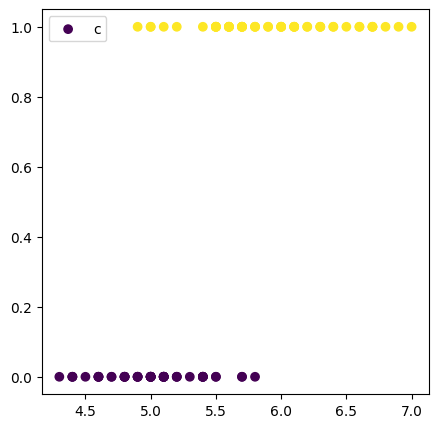

In [ ]:
target.head()

df_joined = df.join(target, how="inner")
df_joined.head()

plt.figure(figsize = (5,5))
plt.scatter(x= df_joined['sepal length (cm)'], y = df_joined['target'], c = df_joined["target"], label)
plt.legend("clor")

In [ ]:
type(df) == type(target)

True

In [ ]:
df.index.all() == target.index.all()

True

In [ ]:
# now we have filtered features and target. Target is encoded
# Perhaps we can normalize the data
# But first we have to split it

#split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2)

# https://chatgpt.com/c/67c1cbc2-5668-8002-bb88-abfc66da7b25


# standardize
standardiser = StandardScaler()

X_train_normalized = standardiser.fit_transform(X_train)
X_test_normalized = standardiser.transform(X_test)
X_train_normalized




array([[-1.32914156, -0.01607453, -0.89310476, -0.996579  ],
       [-0.53205517,  1.48421494, -0.82380469, -0.996579  ],
       [-0.37263789,  2.12719613, -0.89310476, -1.17533756],
       [-0.21322061,  1.26988787, -0.89310476, -0.996579  ],
       [ 1.54036946,  0.19825254,  1.1858976 ,  1.32728234],
       [ 2.17803857, -0.65905573,  1.39379783,  1.14852378],
       [-1.48855884, -1.73069106, -1.03170492, -0.81782043],
       [ 0.90270034, -0.8733828 ,  1.60169807,  1.50604091],
       [-0.69147245, -0.2304016 , -0.82380469, -0.996579  ],
       [-1.8073934 , -0.2304016 , -1.17030508, -1.17533756],
       [-0.05380333,  1.698542  , -1.03170492, -0.63906187],
       [-0.37263789,  0.84123374, -0.89310476, -0.996579  ],
       [-1.01030701, -0.2304016 , -0.96240484, -0.81782043],
       [ 1.69978674, -0.65905573,  1.25519767,  1.32728234],
       [ 0.90270034,  0.62690667,  1.1858976 ,  1.50604091],
       [-0.53205517,  0.4125796 , -0.75450461, -0.4603033 ],
       [ 1.06211762, -0.

In [ ]:
type(X_train) == type(y_train)

True

In [ ]:
type(X_train_normalized) # looks like the np.array type replace the dataframe type when we standardise.

numpy.ndarray

In [ ]:
# Convert all objects to torch.tensor

y_train = np.array(y_train)
y_test = np.array(y_test)
X_train_final = torch.tensor(X_train_normalized, dtype=torch.float32)
X_test_final = torch.tensor(X_test_normalized, dtype=torch.float32) # float type
y_train_final = torch.tensor(y_train, dtype=torch.long) # int type
y_test_final = torch.tensor(y_test, dtype=torch.long)


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(X_train_final, y_train_final) # group features and target together in order to use a dataloader with both at tsame time
test_data = TensorDataset(X_test_final, y_test_final)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True) # crée un itérateur qui charge les données d'entraînement par mini-lots de taille 16,
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)# et avec shuffle=True, les données seront mélangées avant chaque époque.

# Now have the right objects, standardized and with a nice format.
# Time to build the class of the model NN

In [ ]:
# avec une classe de modele + entrainement "a la main"

class SimpleNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim = 2):
    super(SimpleNN, self).__init__()
    self.hidden1 = nn.Linear(input_dim, hidden_dim)
    self.activation = nn.ReLU()
    self.output = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    x = self.hidden1(x)
    x = self.activation(x)
    x = self.output(x)
    return x




In [ ]:
for inputs, labels in train_loader: # we train in mini batch (16)
  print("-----")
  print(labels.shape)
  print(labels)

-----
torch.Size([16, 1])
tensor([[0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]])
-----
torch.Size([16, 1])
tensor([[0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1]])
-----
torch.Size([16, 1])
tensor([[1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]])
-----
torch.Size([16, 1])
tensor([[0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0]])
-----
torch.Size([16, 1])
tensor([[1],
        [1],
        

Parameter containing:
tensor([[-0.4443,  0.0893,  0.3066,  0.4809],
        [ 0.3468, -0.4178,  0.0849, -0.1190],
        [ 0.4342, -0.1549, -0.0324, -0.2635],
        [ 0.0106, -0.2390, -0.1664,  0.0837],
        [ 0.2593,  0.1123,  0.0265,  0.3584]], requires_grad=True)
Parameter containing:
tensor([-0.2374,  0.2343,  0.4572, -0.3863,  0.0124], requires_grad=True)
Parameter containing:
tensor([[ 0.2416,  0.2831,  0.2373,  0.3489, -0.3978],
        [ 0.2865,  0.0332,  0.3745, -0.3694,  0.2397]], requires_grad=True)
Parameter containing:
tensor([ 0.0747, -0.2306], requires_grad=True)
Epoch [10/100], Loss: 0.5567, Accuracy: 92.50%
Epoch [20/100], Loss: 0.4648, Accuracy: 97.50%
Epoch [30/100], Loss: 0.3852, Accuracy: 100.00%
Epoch [40/100], Loss: 0.3242, Accuracy: 100.00%
Epoch [50/100], Loss: 0.2506, Accuracy: 100.00%
Epoch [60/100], Loss: 0.1512, Accuracy: 100.00%
Epoch [70/100], Loss: 0.0911, Accuracy: 100.00%
Epoch [80/100], Loss: 0.0604, Accuracy: 100.00%
Epoch [90/100], Loss: 0.042

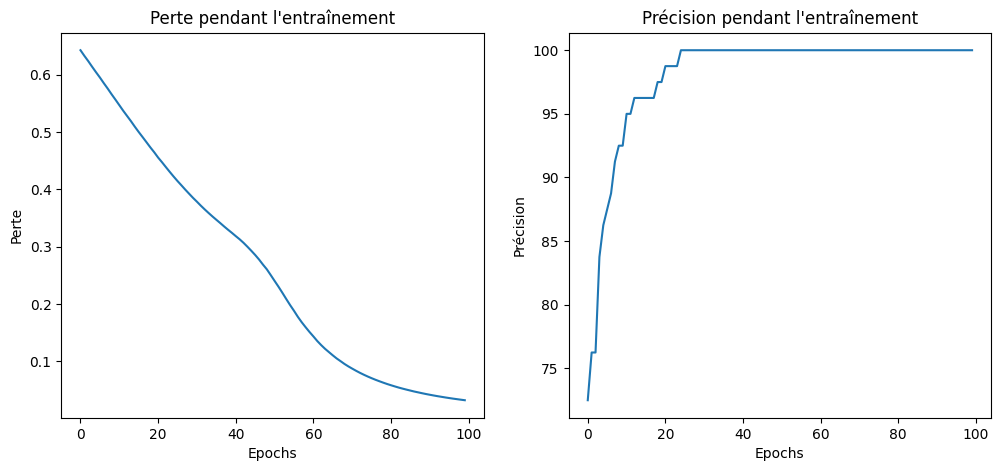

In [ ]:
# initialize model
model = SimpleNN(input_dim = X_train_normalized.shape[1], hidden_dim= 5)

# loss function and opitmizer
criterion = nn.CrossEntropyLoss() #CrossEntropyLoss attend des labels sous forme d'indices scalaires (0 ou 1),
# et non sous forme de tenseurs 2D ou de tableaux numpy avec shape (n, 1). ==> Utiliser squeeze()
optimizer = optim.Adam(model.parameters(), lr = 0.001)# parameters of the model (all weights and biais)

# check the parameters
for param in model.parameters():
    print(param)


# train model
epochs = 100
train_loss = [] # empty lists to record loss and accuracy at each epoch
train_accuracy = []

for epoch in range(epochs): #we train 100 times on all the data
    model.train()  # met le modèle en mode entraînement, ce qui active les fonctionnalités comme le dropout et le batch normalization spécifiques à l'entraînement.
    # par opposition au mode model.eval()
    running_loss = 0.0 # to get the cumulative loss accross the loops
    correct_predictions = 0
    total = 0

    for inputs, labels in train_loader: # we train in mini batch (16)
        labels = labels.squeeze()# plutot à mettre lors de la définition de Y
        optimizer.zero_grad() # mise a 0 des gradients
        outputs = model(inputs)# forward pass, (batch_size, num_classes), où chaque ligne contient les scores (logits) pour chaque classe pour chaque exemple dans le lot (batch).

        loss = criterion(outputs, labels)# loss

        loss.backward() # backprpagation
        optimizer.step() # updates weights and biais

        running_loss += loss.item() # get the cumulative loss accross batches

        # preds
        _, predicted = torch.max(outputs, 1)# Prédictions du modèle (classe avec le score maximal), ndique que la fonction torch.max doit rechercher le maximum le long de l'axe des colonnes
        total += labels.size(0) # .size(0) renvoie la taille de la première dimension d'un tensor.
        correct_predictions += (predicted == labels).sum().item() # Nombre de prédictions correctes dans ce batch

    # Calcul de la perte et de la précision
    avg_loss = running_loss / len(train_loader) #  Perte moyenne sur tous les batches (nb_exemples/taille_batch), à chaque epoch
    accuracy = 100 * correct_predictions / total #  nombre total de prédictions correctes pendant l'epoch
    train_loss.append(avg_loss) # apend list, pour suivre l'évolution de la performance du modèle au fil des epochs
    train_accuracy.append(accuracy) #same

    # Affichage de la progression
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")



# Visualiser
plt.figure(figsize=(12, 5))

# Perte
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Loss')
plt.title("Perte pendant l'entraînement")
plt.xlabel('Epochs')
plt.ylabel('Perte')

# Précision
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Accuracy')
plt.title("Précision pendant l'entraînement")
plt.xlabel('Epochs')
plt.ylabel('Précision')

plt.show()



In [ ]:
# Evaluate model on test dataset
model.eval()  # Mise en mode évaluation, l'autre mode de ce qu'on a vu plus haut
correct_predictions = 0
total = 0

with torch.no_grad(): # desactive la mise à jour des gradients, pour accélérer les calculs
    for inputs, labels in test_loader:
        labels = labels.squeeze() # plutot à mettre lors de la définition de Y
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

test_accuracy = 100 * correct_predictions / total
print(f"Précision sur le jeu de test : {test_accuracy:.2f}%")



Précision sur le jeu de test : 100.00%


Objectif : Modifier le modèle SimpleNN pour ajouter une deuxième couche cachée avec une activation ReLU.

Instructions :
Modifie la classe SimpleNN pour ajouter une seconde couche cachée avec hidden_dim=3 neurones.
Ajoute une activation ReLU() entre la première et la deuxième couche cachée.
Modifie le forward pass pour prendre en compte cette nouvelle couche.
Réentraîne le modèle et compare la performance avec le modèle initial.

In [ ]:

class SimpleNN2(nn.Module):
  def __init__(self, input_dim, hidden_dim1, hidden_dim2= 3, output_dim = 2):
    super(SimpleNN2, self).__init__()
    self.hidden1 = nn.Linear(input_dim, hidden_dim1)
    self.activation1 = nn.ReLU()
    self.hidden2 = nn.Linear(hidden_dim1, hidden_dim2)
    self.activation2 = nn.ReLU()
    self.output = nn.Linear(hidden_dim2, output_dim)

  def forward(self, x):
    x = self.hidden1(x)
    x = self.activation1(x)
    x = self.hidden2(x)
    x = self.activation2(x)
    x = self.output(x)
    return x


current epoch: 0, current train accuracy: 0.475
current epoch: 10, current train accuracy: 0.475
current epoch: 20, current train accuracy: 0.5875
current epoch: 30, current train accuracy: 1.0
current epoch: 40, current train accuracy: 1.0
current epoch: 50, current train accuracy: 1.0
current epoch: 60, current train accuracy: 1.0
current epoch: 70, current train accuracy: 1.0
current epoch: 80, current train accuracy: 1.0
current epoch: 90, current train accuracy: 1.0
final accuracy 1.0


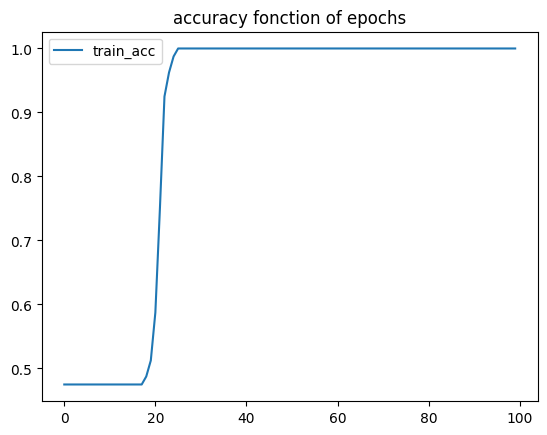

In [ ]:
model = SimpleNN2(input_dim = X_train_normalized.shape[1], hidden_dim1= 5)

# loss function and opitmizer
criterion = nn.CrossEntropyLoss() #CrossEntropyLoss attend des labels sous forme d'indices scalaires (0 ou 1),
# et non sous forme de tenseurs 2D ou de tableaux numpy avec shape (n, 1). ==> Utiliser squeeze()
optimizer = optim.Adam(model.parameters(), lr = 0.001)# parameters of the model (all weights and biais)


train_acc = [] # empty list to follow acc with the epochs
for epoch in range(epochs):
  model.train()
  compteur_preds = 0
  total = 0
  for inputs, labels in train_loader:
    labels = labels.squeeze()# plutot à mettre lors de la définition de Y
    optimizer.zero_grad() # mise a 0 des gradients
    outputs = model(inputs)

    loss = criterion(outputs, labels)# loss

    loss.backward() # backprpagation
    optimizer.step() # updates weights and biais
    # preds
    _, predicted = torch.max(outputs, 1)# Prédictions du modèle (classe avec le score maximal), ndique que la fonction torch.max doit rechercher le maximum le long de l'axe des colonnes
    compteur_preds += (predicted == labels).sum().item()
    total += labels.size(0) # exemples du batch


  accuracy = compteur_preds / total
  if epoch % 10 == 0 :
    print(f'current epoch: {epoch}, current train accuracy: {accuracy}')
  train_acc.append(accuracy)

print(f'final accuracy {accuracy}')


train_acc
plt.plot(range(epoch+1),train_acc, label = "train_acc")
plt.title("accuracy fonction of epochs")
plt.legend()






In [ ]:
correct_preds = 0
total = 0

for inputs, labels in test_loader:
  labels = labels.squeeze()
  model.eval()

  outputs = model(inputs)

  _, preds = torch.max(outputs, 1)
  correct_preds += (preds == labels).sum().item()
  total += labels.size(0)

accuracy = correct_preds / total
print(f"test acc: {accuracy}")


test acc: 1.0


Objectif :
Ajouter Dropout dans ton modèle pour éviter le sur-apprentissage (overfitting). Le Dropout est une technique qui consiste à désactiver aléatoirement une proportion des neurones pendant l'entraînement afin d'empêcher le modèle de trop dépendre de certains neurones spécifiques.

Instructions :

Ajoute une couche Dropout après chaque couche cachée dans ton modèle (SimpleNN2).
La probabilité de "drop" des neurones (i.e., leur mise à zéro) doit être de 0.2 (20%).
Teste l'impact du Dropout en réentraîner ton modèle et en comparant la performance sur le jeu de test avec et sans Dropout.

In [ ]:


# Lorsque on utilises Dropout, le mode d'évaluation (c'est-à-dire lors de
# l'évaluation sur le test set) est automatiquement géré par PyTorch. Pendant
# l'entraînement, Dropout est activé, et lors de l'évaluation avec
# model.eval(), Dropout est désactivé.

class SimpleNN2(nn.Module):
  def __init__(self, input_dim, hidden_dim1, hidden_dim2= 3, output_dim = 2, dropout_prob = 0.2):
    super(SimpleNN2, self).__init__()
    self.hidden1 = nn.Linear(input_dim, hidden_dim1)
    self.dropout1 = nn.Dropout(p=dropout_prob)
    self.activation1 = nn.ReLU()
    self.hidden2 = nn.Linear(hidden_dim1, hidden_dim2)
    self.dropout2 = nn.Dropout(p= dropout_prob )
    self.activation2 = nn.ReLU()
    self.output = nn.Linear(hidden_dim2, output_dim)

  def forward(self, x):
    x = self.hidden1(x)
    x = self.dropout1(x)
    x = self.activation1(x)
    x = self.hidden2(x)
    x = self.dropout2(x)
    x = self.activation2(x)
    x = self.output(x)
    return x


In [ ]:
def L2_regul(model, lambda_val):
  l2_regul = 0
  for param in model.params():
    l2_regul += torch.sum(param.pow(2))
  return lambda_val * l2_regul

loss = criter(outputs, labels) + L2_regul(model, 0.1)

Exercice 1 : Régression linéaire avec PyTorch
Objectif : Créer un modèle de régression linéaire simple avec PyTorch. L'objectif est d'apprendre à manipuler les tenseurs, à définir un modèle et à l'entraîner.

Concepts à comprendre :
Les tenseurs PyTorch (similaires aux tableaux NumPy mais avec des capacités supplémentaires pour les calculs GPU).
La régression linéaire : Une équation linéaire entre les variables d'entrée et de sortie.
Loss function : Utiliser la Mean Squared Error (MSE) comme fonction de perte.
Optimisation : Utilisation de l'optimiseur SGD (Stochastic Gradient Descent).
Étapes de l'exercice :
Générer un jeu de données synthétiques pour la régression linéaire, avec une relation linéaire entre les variables X et Y.
Définir un modèle de régression linéaire simple avec une seule couche linéaire dans PyTorch.
Définir la fonction de perte MSE et l'optimiseur.
Entraîner le modèle sur les données et afficher les courbes de perte pendant l'entraînement.
Évaluer la performance du modèle (en termes de MSE sur un jeu de test).
Conseils :

Utilise torch.nn.Linear pour créer une couche linéaire.
Pour la fonction de perte, utilise torch.nn.MSELoss.
Utilise torch.optim.SGD pour l'optimisation.

In [ ]:
###############################

In [ ]:
# Importer les librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split



In [ ]:
# Charger le dataset Boston Housing
housing = fetch_california_housing()
df = pd.DataFrame(data = housing["data"], columns = housing["feature_names"])
df

target = pd.DataFrame(data = housing["target"], columns = housing["target_names"])
target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
print(f'target: {target.shape}')
print(f'features df: {df.shape}')

target: (20640, 1)
features df: (20640, 8)


In [ ]:
#So the data are loaded and this will be a regression problem
for col in df.columns:
  print((df[col].dtype))# only floats, so no need any encoding

float64
float64
float64
float64
float64
float64
float64
float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2 )


In [ ]:
X_train.shape


(16512, 8)

In [ ]:
# We can normalize the data
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

standardizer = StandardScaler()

X_train_rescaled = standardizer.fit_transform(X_train)
X_test_rescaled = standardizer.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Tensorize
X_train_rescaled_torch = torch.tensor(X_train_rescaled, dtype = torch.float32)
X_test_rescaled_torch = torch.tensor(X_test_rescaled, dtype = torch.float32)
y_train_rescaled_torch = torch.tensor(y_train, dtype = torch.float32).squeeze() # form (N,1) to (N,)with squeeze
y_test_rescaled_torch = torch.tensor(y_test, dtype = torch.float32).squeeze()




# Group features and target
train_data = TensorDataset(X_train_rescaled_torch, y_train_rescaled_torch) # group features and target together in order to use a dataloader with both at tsame time
test_data = TensorDataset(X_test_rescaled_torch, y_test_rescaled_torch)

# Build a dataloader for M
train_loader = DataLoader(train_data, batch_size=16, shuffle=True) # crée un itérateur qui charge les données d'entraînement par mini-lots de taille 16,
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)# et avec shuffle=True, les données seront mélangées avant chaque époque.


In [ ]:
y_train_rescaled_torch.shape
#torch.Size([16512]) # works well

torch.Size([16512])

In [ ]:
# Now we can build the class

class Reglin(nn.Module):
  def __init__(self, input_dim):
    super(Reglin, self).__init__()
    self.out = nn.Linear(input_dim, 1) # 1 neurn as output dim as we are in regression

  def forward(self, x):
    x = self.out(x)
    return x


In [ ]:
# Initialize
input_dim = X_train_rescaled_torch.shape[1]
model = Reglin(input_dim)

# Now Loss + optimizer

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch : 0, loss value: 2.566889762878418
epoch : 1, loss value: 1.5560195446014404
epoch : 2, loss value: 1.1043397188186646
epoch : 3, loss value: 1.0345314741134644
epoch : 4, loss value: 1.7209067344665527
epoch : 5, loss value: 1.3023712635040283
epoch : 6, loss value: 1.1616222858428955
epoch : 7, loss value: 1.2409566640853882
epoch : 8, loss value: 1.465123176574707
epoch : 9, loss value: 1.9036237001419067
epoch : 10, loss value: 1.4749436378479004
epoch : 11, loss value: 1.3685517311096191
epoch : 12, loss value: 1.8128191232681274
epoch : 13, loss value: 1.1755011081695557
epoch : 14, loss value: 2.034064531326294
epoch : 15, loss value: 1.1195006370544434
epoch : 16, loss value: 0.8991707563400269
epoch : 17, loss value: 0.5292848944664001
epoch : 18, loss value: 1.0443536043167114
epoch : 19, loss value: 1.130422830581665
epoch : 20, loss value: 1.054944396018982
epoch : 21, loss value: 1.6277129650115967
epoch : 22, loss value: 0.8342546224594116
epoch : 23, loss value: 1.

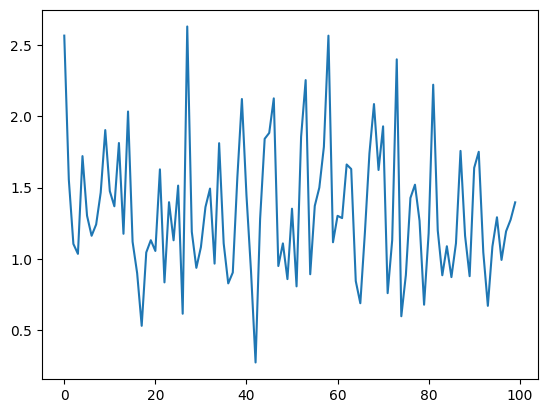

In [ ]:
#training

epochs = 100
loss_recorder = []

for epoch in range(epochs):
  model.train()# train mode
  for inputs, outs in train_loader:
    optimizer.zero_grad()# reset grad

    output = model(inputs)
    loss_value = loss(output, outs)
    loss_value.backward() # backprpagation
    optimizer.step() # updates weights and biais
  loss_recorder.append(loss_value.item())
  print(f'epoch : {epoch}, loss value: {loss_value.item()}')

plt.plot(range(epochs), loss_recorder)


In [ ]:
 # test dataset

with torch.no_grad():
  model.eval()
  for inputs, outs in test_loader:
    output = model(inputs)
    loss_test = loss(output.squeeze(), outs)
    print(f'loss on test : {loss_test}')
    r2_test = r2_score(outs, output.squeeze())
    print(f'R² sur le test : {r2_test}')



loss on test : 1.1090763807296753
R² sur le test : 0.028356823421034516
loss on test : 0.7048069834709167
R² sur le test : 0.07187426968943045
loss on test : 0.9953145384788513
R² sur le test : 0.0682804968121471
loss on test : 1.3943856954574585
R² sur le test : 0.10890835702886092
loss on test : 1.3420331478118896
R² sur le test : -0.03523738401000154
loss on test : 0.9097768664360046
R² sur le test : 0.0582487520807361
loss on test : 1.0744330883026123
R² sur le test : -0.08579579091710632
loss on test : 1.1845124959945679
R² sur le test : 0.07360406825176191
loss on test : 1.2061132192611694
R² sur le test : -0.17253345380441543
loss on test : 0.9284497499465942
R² sur le test : -0.08722181022660402
loss on test : 1.6245559453964233
R² sur le test : 0.0441121398996317
loss on test : 0.996854841709137
R² sur le test : -0.04112024579186402
loss on test : 1.185674786567688
R² sur le test : 0.10718523471410812
loss on test : 0.8273124694824219
R² sur le test : 0.017763418596958402
loss

Objectif :
Utiliser un réseau de neurones pour classer les vins en fonction de leurs caractéristiques chimiques.
Utiliser un modèle de réseau de neurones avec une architecture différente de celle que nous avons utilisée dans l'exercice précédent.
Étapes :
Charger le jeu de données Wine. Le jeu de données Wine est disponible dans sklearn.datasets. Nous allons l'utiliser pour effectuer une classification multi-classes.

Préparer les données. Nous allons normaliser les caractéristiques, puis les séparer en ensembles d'entraînement et de test.

Construire un réseau de neurones. Cette fois, nous allons utiliser un modèle de réseau de neurones avec 3 couches cachées et des fonctions d'activation ReLU.

Entraîner et évaluer le modèle. Nous allons entraîner le modèle avec la fonction de perte CrossEntropyLoss (adaptée à la classification multi-classes) et l'optimiseur Adam.



In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

In [ ]:
wine = datasets.load_wine()
wine
df = pd.DataFrame(data = wine["data"], columns = wine["feature_names"])
df

target = pd.DataFrame(data  = wine["target"], columns = ["wine_type_region"])
target


,wine_type_region
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2)

standardizer = StandardScaler()

print(type(X_train))
print(f'X_train mean: {np.mean(X_train, axis =0)}, std: {np.std(X_train, axis =0)} ')
X_train_rescaled = standardizer.fit_transform(X_train)
X_test_rescaled = standardizer.transform(X_test)
print("_____________")
print(type(X_train_rescaled))
print(f'X_train mean: {np.mean(X_train_rescaled, axis =0)}, std: {np.std(X_train_rescaled, axis =0)} ')


<class 'pandas.core.frame.DataFrame'>
X_train mean: alcohol                          12.964930
malic_acid                        2.279718
ash                               2.364296
alcalinity_of_ash                19.615493
magnesium                        99.725352
total_phenols                     2.306901
flavanoids                        2.064930
nonflavanoid_phenols              0.360000
proanthocyanins                   1.615563
color_intensity                   4.957535
hue                               0.971099
od280/od315_of_diluted_wines      2.625845
proline                         745.225352
dtype: float64, std: alcohol                           0.829799
malic_acid                        1.089114
ash                               0.272537
alcalinity_of_ash                 3.381855
magnesium                        14.376793
total_phenols                     0.630745
flavanoids                        0.989873
nonflavanoid_phenols              0.125120
proanthocyanins         

In [ ]:
# the normalization is ok

y_train = np.array(y_train)
y_test = np.array(y_test)

# so now let's convert it in torch data, then group it, then dataloader for mini batches

# tensor
X_train_rescaled_torch = torch.tensor(X_train_rescaled, dtype = torch.float32)
X_test_rescaled_torch  = torch.tensor(X_test_rescaled, dtype = torch.float32)
y_train_rescaled_torch = torch.tensor(y_train, dtype = torch.long)
y_test_rescaled_torch  = torch.tensor(y_test, dtype = torch.long)


#group
train_data = TensorDataset(X_train_rescaled_torch,y_train_rescaled_torch)
test_data  = TensorDataset(X_test_rescaled_torch,y_test_rescaled_torch)
#loader
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)# et avec shuffle=True, les données seront mélangées avant chaque époque.


In [ ]:
# print
for i in range(5):
    features, target = train_data[i]
    print(f'Échantillon {i + 1} :')
    print('Caractéristiques:', features)
    print('Cible:', target)
    print('---')

Échantillon 1 :
Caractéristiques: tensor([-1.3918, -0.1466,  1.3785,  0.5572,  2.3840, -1.1207, -1.0859, -1.7583,
        -0.0970, -1.0713, -0.0933, -0.5368, -0.3658])
Cible: tensor([1])
---
Échantillon 2 :
Caractéristiques: tensor([-1.0785, -0.1099, -0.7129,  0.4094, -1.0242,  0.4647,  0.5911,  0.0799,
        -0.4637, -0.9579, -0.4912,  0.9599, -1.1172])
Cible: tensor([1])
---
Échantillon 3 :
Caractéristiques: tensor([ 0.6569, -0.4405,  1.0483, -0.1820,  0.7147,  0.0683,  0.4698, -0.5595,
        -0.1319, -0.3302,  0.5700,  0.3583,  1.0641])
Cible: tensor([0])
---
Échantillon 4 :
Caractéristiques: tensor([ 0.2351,  1.1847, -0.7863,  0.4094,  0.1582, -1.2793, -1.5304,  0.5595,
        -0.5510, -0.4174, -1.6409, -1.3879,  0.2579])
Cible: tensor([2])
---
Échantillon 5 :
Caractéristiques: tensor([-0.1506,  0.6246,  0.9015,  1.2965,  0.0887,  0.0208, -1.4799,  1.3587,
        -1.4066, -0.0164, -0.3586, -0.6982, -0.4722])
Cible: tensor([2])
---


In [ ]:
# now let's build the class

# Construire un réseau de neurones. Cette fois, nous allons utiliser un modèle
# de réseau de neurones avec 3 couches cachées et des fonctions d'activation
# ReLU.
# Entraîner et évaluer le modèle. Nous allons entraîner le modèle avec la
# fonction de perte CrossEntropyLoss (adaptée à la classification
# multi-classes) et l'optimiseur Adam.


class Neuralnets(nn.Module):
  def __init__(self, input_size, hidden_size_1, hidden_size_2, hidden_size_3, output_size = 3):
    super(Neuralnets, self).__init__()
    self.hidden_1 = nn.Linear(input_size,hidden_size_1)
    self.activ_1 = nn.ReLU()
    self.hidden_2 = nn.Linear(hidden_size_1,hidden_size_2)
    self.activ_2 = nn.ReLU()
    self.hidden_3 = nn.Linear(hidden_size_2,hidden_size_3)
    self.activ_3 = nn.ReLU()
    self.out = nn.Linear(hidden_size_3, output_size)

  def forward(self, x):
    x = self.hidden_1(x)
    x = self.activ_1(x)
    x = self.hidden_2(x)
    x = self.activ_2(x)
    x = self.hidden_3(x)
    x = self.activ_3(x)
    x = self.out(x)
    return x


In [ ]:
X_train_rescaled

array([[-1.39181902, -0.14664979,  1.37854206, ..., -0.09329017,
        -0.53683611, -0.3657639 ],
       [-1.07849001, -0.10992268, -0.71291426, ..., -0.49123689,
         0.9598981 , -1.11721676],
       [ 0.65687068, -0.44046664,  1.04831212, ...,  0.56995437,
         0.35826964,  1.06412614],
       ...,
       [-1.31951232,  1.86415931,  0.0943145 , ..., -0.97761622,
         1.48815724, -1.11113212],
       [-0.65670095,  1.97434063,  1.34184985, ..., -0.22593908,
         0.72511626, -1.15676691],
       [ 0.10251935,  3.23224404, -0.85968312, ..., -1.06604883,
         0.69576854, -1.11113212]])

In [ ]:
model = Neuralnets(input_size = X_train_rescaled.shape[1], hidden_size_1 = 4, hidden_size_2 = 7, hidden_size_3 = 3 )

loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
#train

epochs = 50
loss_recorder = []
accuracy_recorder = []

for epoch in range(epochs):
  print(f'epoch: {epoch}')
  model.train()
  loss_cumulator = 0
  correct_cumulator = 0
  total = 0
  for inputs, labels in train_loader:
    labels = labels.squeeze()
    optim.zero_grad()
    outputs = model(inputs)
    loss_value = loss(outputs, labels.squeeze())
    loss_value.backward()
    optim.step()

    _, preds = torch.max(outputs, 1)
    print(f'preds : {preds}, labels : {labels}')
    print(f'Size of preds: {preds.size()}, Size of labels: {labels.size()}')
    correct_preds = (preds == labels).sum().item()
    print(f'---------- preds {correct_preds}, batches: {labels.size(0)}')
    loss_cumulator += loss_value.item()
    correct_cumulator += correct_preds
    total += labels.size(0)
    ratio_correct_preds = correct_cumulator / total
    print(f'current number of batches in th epoch: {total}')
    print(f'current number of correct preds in the batch : {correct_cumulator}')
    print(f'ratio correct preds: {ratio_correct_preds}')

  loss_recorder.append(loss_cumulator)
  accuracy_recorder.append(ratio_correct_preds)
  print(f'epoch : {epoch}')
  print(f'current accuracy: {ratio_correct_preds}, current loss: {loss_cumulator}')







epoch: 0
preds : tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), labels : tensor([1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1])
Size of preds: torch.Size([16]), Size of labels: torch.Size([16])
---------- preds 9, batches: 16
current number of batches in th epoch: 16
current number of correct preds in the batch : 9
ratio correct preds: 0.5625
preds : tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), labels : tensor([2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1])
Size of preds: torch.Size([16]), Size of labels: torch.Size([16])
---------- preds 8, batches: 16
current number of batches in th epoch: 32
current number of correct preds in the batch : 17
ratio correct preds: 0.53125
preds : tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), labels : tensor([2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1])
Size of preds: torch.Size([16]), Size of labels: torch.Size([16])
---------- preds 7, batches: 16
current number of batches in th epoch: 48
current number of c

**Comparaison LIME vs SHAP**

SHAP fournit des explications globales (en analysant l'impact de chaque caractéristique sur toutes les instances), tandis que LIME est plus local (il explique les prédictions pour des instances spécifiques).
LIME est plus simple et peut être utilisé avec une variété de modèles, mais ses explications sont parfois moins stables et fiables par rapport à SHAP, qui a une base théorique plus solide.
SHAP fournit des valeurs plus robustes et mathématiquement bien fondées, surtout pour les modèles complexes.

Shape of X_train_rescaled_numpy: (100, 13)
Shape of shap_values: (100, 13, 3)


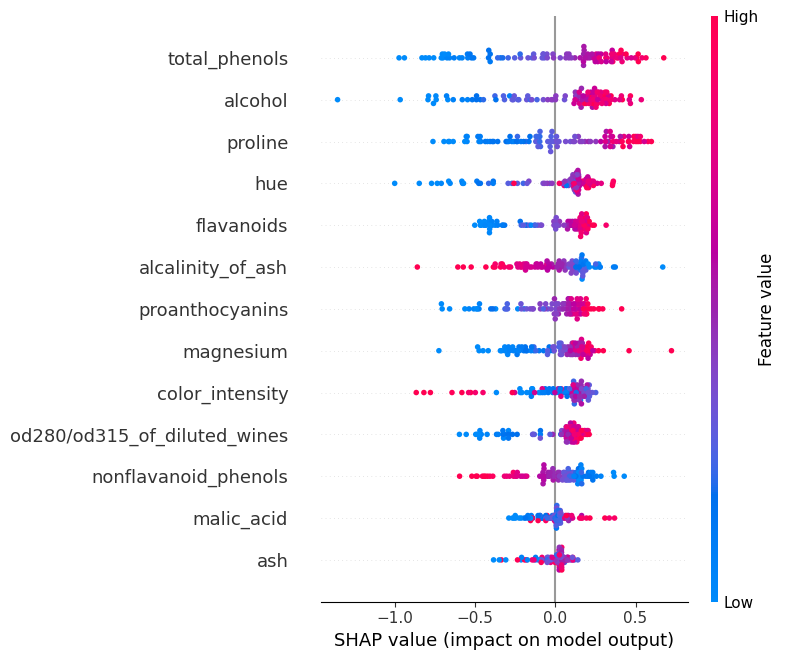

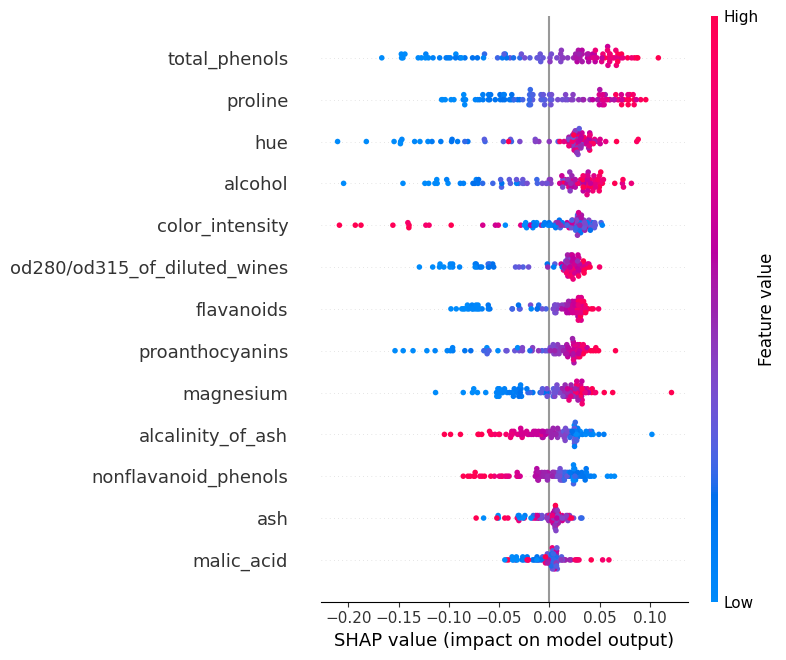

In [ ]:
import shap
import torch
import numpy as np

feature_names = df.columns.tolist()  # Liste des noms des colonnes depuis le dataset de base

# Fonction de prédiction adaptée à SHAP, en retournant des valeurs numpy.
def predict_fn(inputs):
    # Convertir les entrées en tensor PyTorch si ce n'est pas déjà fait.
    inputs = torch.tensor(inputs, dtype=torch.float32)  # Assurer que c'est un tensor
    model.eval()  # Assurer que le modèle est en mode évaluation
    with torch.no_grad():  # Désactiver les gradients lors des prédictions
        outputs = model(inputs)  # Passer les données dans le modèle
    return outputs.detach().cpu().numpy()  # Convertir les sorties en numpy array
    #x.detach() pour créer un tensor qui ne fait plus partie du graphique
    # cpu() pour que les calculs se fassent sur le cpu(), car Certaines opérations, comme la visualisation avec SHAP
    # ou la conversion en numpy, nécessitent que les données soient sur le CPU

# Créer un explainer SHAP, en utilisant predict_fn pour la prédiction
explainer = shap.Explainer(predict_fn, X_train_rescaled_torch.numpy())  # Passer X_train comme un numpy array
# SHAP saura utiliser predict_fn pour faire des prédictions. Chaque fois qu'il aura
# besoin de faire une prédiction pour un sous-ensemble de données d'entrée,
# il appellera predict_fn(inputs).


# Sélectionner un sous-ensemble de données d'entraînement pour l'explication (ici, on prend les 100 premiers échantillons)
shap_values = explainer(X_train_rescaled_torch[:100].numpy())  # Passer un sous-ensemble sous forme numpy

# Convertir X_train_rescaled_torch en numpy array pour l'utiliser dans summary_plot
X_train_rescaled_numpy = X_train_rescaled_torch[:100].numpy()  # Utiliser un sous-ensemble de 100 échantillons

# Vérification de la forme des données (dimensions)
print(f"Shape of X_train_rescaled_numpy: {X_train_rescaled_numpy.shape}")
print(f"Shape of shap_values: {shap_values.values.shape}")

# Visualiser les valeurs de SHAP pour la première classe (par exemple)
shap.summary_plot(shap_values[:, :, 0], X_train_rescaled_numpy, feature_names=feature_names)  # Afficher pour la première classe

# Si tu veux visualiser la moyenne des valeurs SHAP sur toutes les classes
shap.summary_plot(shap_values.values.mean(axis=2), X_train_rescaled_numpy, feature_names=feature_names)  # Moyenne des valeurs sur les classes


In [ ]:
pip install lime


In [ ]:
######## LIME #####################

import torch
import torch.nn.functional as F

# Fonction de prédiction pour LIME
def predict_fn(inputs):
    inputs = torch.tensor(inputs, dtype=torch.float32)  # Convertir en tensor
    model.eval()  # Mettre le modèle en mode évaluation
    with torch.no_grad():
        outputs = model(inputs)  # Effectuer la prédiction
    probabilities = F.softmax(outputs, dim=1)  # Convertir les scores en probabilités
    return probabilities.numpy()  # Retourner les probabilités en numpy


import lime
import lime.lime_tabular

# Création de l'explainer LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_rescaled_numpy,  # Les données d'entraînement
    mode="classification",  # Type de tâche (classification)
    training_labels=y_train,  # Les labels d'entraînement
    feature_names=X_train.columns.tolist(),  # Les noms des caractéristiques
    class_names=["Classe 0", "Classe 1", "Classe 2"],  # Noms des classes
    discretize_continuous=True  # Discrétiser les caractéristiques continues
)

# Sélectionner une instance à expliquer (par exemple, la première instance du test set)
instance = X_test_rescaled[0].reshape(1, -1)  # Sélectionner une instance

# Générer une explication pour l'instance sélectionnée
explanation = explainer.explain_instance(
    instance[0],  # L'instance à expliquer
    predict_fn,  # La fonction de prédiction définie précédemment
    num_features=5  # Nombre de caractéristiques à afficher dans l'explication
)

# Visualiser l'explication sous forme de graphique
explanation.show_in_notebook(show_table=True, show_all=False)
